## Portfolio Part 4

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer

## Business Objective

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimize its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

## Columns Description


* **id**     Unique ID for the customer
* **Gender**     Gender of the customer
* **Age**         Age of the customer
* **Driving_License**  **0** : Customer does not have DL, **1** : Customer already has DL
* **Region_Code**       Unique code for the region of the customer
* **Previously_Insured**  -  1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
* **Vehicle_Age**       Age of the Vehicle
* **Vehicle_Damage**  1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
* **Annual_Premium**  The amount customer needs to pay as premium in the year
* **PolicySalesChannel**	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
* **Vintage**   Number of Days, Customer has been associated with the company
* **Response**  1 : Customer is interested, 0 : Customer is not interested

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder,StandardScaler

import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
warnings.filterwarnings('ignore')

In [2]:
# Reading the data from csv files
test = pd.read_csv('data_files/test.csv')
train = pd.read_csv("data_files/train.csv")
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [4]:
print(train.shape)
print(test.shape)

(381109, 12)
(127037, 11)


In [5]:
# Counting unique Response values 
print(train['Response'].value_counts())

0    334399
1     46710
Name: Response, dtype: int64


# Exploring the Data Set

In [6]:
train=train.drop(columns='id',axis=1)

In [7]:
train.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
train = train.dropna()

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


In [10]:
## Converting Object to int values
le = LabelEncoder()
le_count = 0

for col in train:
    if train[col].dtype == 'object':
        if len(list(train[col].unique())) <= 2:
            le.fit(train[col])
            train[col] = le.transform(train[col])
                      
            le_count += 1
            print('%d columns were label encoded.' % le_count)

1 columns were label encoded.
2 columns were label encoded.


In [11]:
train_digit = pd.get_dummies(train)

In [12]:
train_digit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Gender                 381109 non-null  int32  
 1   Age                    381109 non-null  int64  
 2   Driving_License        381109 non-null  int64  
 3   Region_Code            381109 non-null  float64
 4   Previously_Insured     381109 non-null  int64  
 5   Vehicle_Damage         381109 non-null  int32  
 6   Annual_Premium         381109 non-null  float64
 7   Policy_Sales_Channel   381109 non-null  float64
 8   Vintage                381109 non-null  int64  
 9   Response               381109 non-null  int64  
 10  Vehicle_Age_1-2 Year   381109 non-null  uint8  
 11  Vehicle_Age_< 1 Year   381109 non-null  uint8  
 12  Vehicle_Age_> 2 Years  381109 non-null  uint8  
dtypes: float64(3), int32(2), int64(5), uint8(3)
memory usage: 27.3 MB


In [13]:
train_digit.head(10)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,28.0,0,1,40454.0,26.0,217,1,0,0,1
1,1,76,1,3.0,0,0,33536.0,26.0,183,0,1,0,0
2,1,47,1,28.0,0,1,38294.0,26.0,27,1,0,0,1
3,1,21,1,11.0,1,0,28619.0,152.0,203,0,0,1,0
4,0,29,1,41.0,1,0,27496.0,152.0,39,0,0,1,0
5,0,24,1,33.0,0,1,2630.0,160.0,176,0,0,1,0
6,1,23,1,11.0,0,1,23367.0,152.0,249,0,0,1,0
7,0,56,1,28.0,0,1,32031.0,26.0,72,1,1,0,0
8,0,24,1,3.0,1,0,27619.0,152.0,28,0,0,1,0
9,0,32,1,6.0,1,0,28771.0,152.0,80,0,0,1,0


In [14]:
train_digit.describe()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,0.540761,38.822584,0.997869,26.388807,0.458210,0.504877,30564.389581,112.034295,154.347397,0.122563,0.525613,0.432385,0.042001
std,0.498336,15.511611,0.046110,13.229888,0.498251,0.499977,17213.155057,54.203995,83.671304,0.327936,0.499344,0.495408,0.200592
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,24405.000000,29.000000,82.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,36.000000,1.000000,28.000000,0.000000,1.000000,31669.000000,133.000000,154.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,39400.000000,152.000000,227.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,85.000000,1.000000,52.000000,1.000000,1.000000,540165.000000,163.000000,299.000000,1.000000,1.000000,1.000000,1.000000


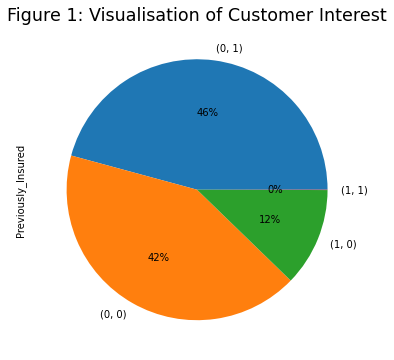

In [15]:
plt.figure(figsize=(12,6))
train.groupby(['Response'])['Previously_Insured'].value_counts().plot(
                                                 kind='pie',autopct='%.0f%%')
plt.title('Figure 1: Visualisation of Customer Interest', fontsize = 17.5)
plt.show()

* **(0,1)** represents, previously insured but this time **not** interested
* **(1,0)** represents, previously **not** insured but this time interested
* **(0,0)** represents neither previously nor this time interested

## Analysis

* Customers between the age of 22 - 28 prefer not to buy insurance the second time.(Figure2)
* Company should evaluate the benefits they're providing to its customer, as 46 percent of customer have shown no interest.(Figure 1)
* Above dataframe has no missing values



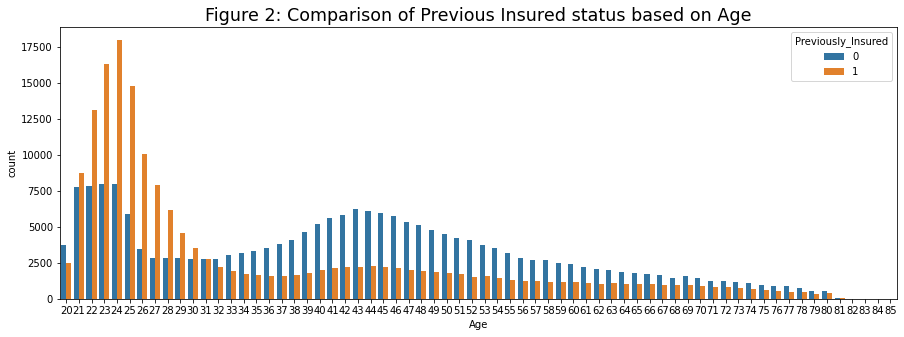

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(train.Age,hue=train.Previously_Insured)
plt.title('Figure 2: Comparison of Previous Insured status based on Age', fontsize = 17.5)
plt.show()

In [17]:
print(train['Age'].corr(train['Response']))

0.11114689471250962


<AxesSubplot:xlabel='Response', ylabel='count'>

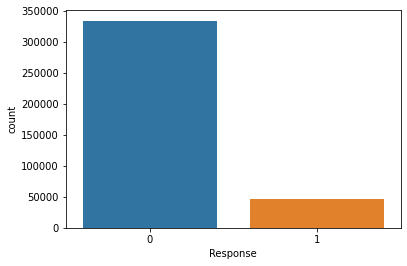

In [18]:
sns.countplot(train_digit['Response'], label="Count")

In [19]:
menResponse1 = train_digit.loc[(train_digit['Gender']>=1) & (train_digit['Response']>=1)].count()
print(menResponse1)

menResponse0 = train_digit.loc[(train_digit['Gender']>=1) & (train_digit['Response']<1)].count()
print(menResponse0)

Gender                   28525
Age                      28525
Driving_License          28525
Region_Code              28525
Previously_Insured       28525
Vehicle_Damage           28525
Annual_Premium           28525
Policy_Sales_Channel     28525
Vintage                  28525
Response                 28525
Vehicle_Age_1-2 Year     28525
Vehicle_Age_< 1 Year     28525
Vehicle_Age_> 2 Years    28525
dtype: int64
Gender                   177564
Age                      177564
Driving_License          177564
Region_Code              177564
Previously_Insured       177564
Vehicle_Damage           177564
Annual_Premium           177564
Policy_Sales_Channel     177564
Vintage                  177564
Response                 177564
Vehicle_Age_1-2 Year     177564
Vehicle_Age_< 1 Year     177564
Vehicle_Age_> 2 Years    177564
dtype: int64


In [20]:
femResponse1 = train_digit.loc[(train_digit['Gender']<=0) & (train_digit['Response']>=1)].count()
print(femResponse1)

femResponse0 = train_digit.loc[(train_digit['Gender']<=0) & (train_digit['Response']<1)].count()
print(femResponse0)

Gender                   18185
Age                      18185
Driving_License          18185
Region_Code              18185
Previously_Insured       18185
Vehicle_Damage           18185
Annual_Premium           18185
Policy_Sales_Channel     18185
Vintage                  18185
Response                 18185
Vehicle_Age_1-2 Year     18185
Vehicle_Age_< 1 Year     18185
Vehicle_Age_> 2 Years    18185
dtype: int64
Gender                   156835
Age                      156835
Driving_License          156835
Region_Code              156835
Previously_Insured       156835
Vehicle_Damage           156835
Annual_Premium           156835
Policy_Sales_Channel     156835
Vintage                  156835
Response                 156835
Vehicle_Age_1-2 Year     156835
Vehicle_Age_< 1 Year     156835
Vehicle_Age_> 2 Years    156835
dtype: int64


In [21]:
genderResponse = {'gender':['Male','Female'],
                  'Interested' : [menResponse1['Response'],femResponse1['Response']], 
                  'Not Interested' : [menResponse0['Response'], femResponse0['Response']], 
                  'ratio' : [(format(menResponse1['Response']/menResponse0['Response'],".2f")),
                             (format(femResponse1['Response']/femResponse0['Response'],".2f"))]} 
                                                                                                                    
genderResponse_df = pd.DataFrame(data=genderResponse)
genderResponse_df
genderResponse_df2=genderResponse_df.set_index('gender')

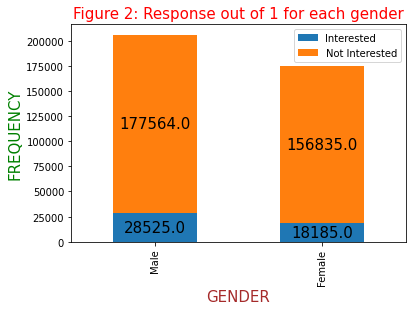

,Interested,Not Interested,ratio
gender,,,
Male,28525,177564,0.16
Female,18185,156835,0.12


In [22]:
ax = genderResponse_df2.plot(stacked=True, kind='bar')

for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=15)
ax.set_xlabel('GENDER',color='brown', fontsize=15)
ax.set_ylabel('FREQUENCY', color='green',fontsize=15)
ax.set_title('Figure 2: Response out of 1 for each gender',color='r', fontsize=15)
# Display chart
plt.show()
genderResponse_df2

## Analysis
* Both males and females have given simliar number of ratings.
* Males have a ratio of 0.16 which translates to for every not-interest there are 0.16 insterest shown for males
* Females have a ratio of 0.12 which translates to for every not-interest there are 0.12 interest shown for females 
* Althought males have higher count of rating, the ratio between males and females are quite similiar which suggest vechicle insurance and interest(response) are accounted in a similiar fashion by both genders, when giving a response.

In [23]:
train_digit.corr()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
Gender,1.000000,0.145545,-0.018374,0.000604,-0.081932,0.091606,0.003673,-0.111159,-0.002517,0.052440,0.147633,-0.166280,0.043155
Age,0.145545,1.000000,-0.079782,0.042574,-0.254682,0.267534,0.067507,-0.577826,-0.001264,0.111147,0.692910,-0.787775,0.220694
Driving_License,-0.018374,-0.079782,1.000000,-0.001081,0.014969,-0.016622,-0.011906,0.043731,-0.000848,0.010155,-0.037403,0.040215,-0.006211
Region_Code,0.000604,0.042574,-0.001081,1.000000,-0.024659,0.028235,-0.010588,-0.042420,-0.002750,0.010570,0.038055,-0.044250,0.014555
Previously_Insured,-0.081932,-0.254682,0.014969,-0.024659,1.000000,-0.824143,0.004269,0.219381,0.002537,-0.341170,-0.279077,0.358773,-0.191352
Vehicle_Damage,0.091606,0.267534,-0.016622,0.028235,-0.824143,1.000000,0.009349,-0.224377,-0.002064,0.354400,0.284717,-0.370778,0.206961
Annual_Premium,0.003673,0.067507,-0.011906,-0.010588,0.004269,0.009349,1.000000,-0.113247,-0.000608,0.022575,-0.002495,-0.022555,0.061918
Policy_Sales_Channel,-0.111159,-0.577826,0.043731,-0.042420,0.219381,-0.224377,-0.113247,1.000000,0.000002,-0.139042,-0.508265,0.571516,-0.146238
Vintage,-0.002517,-0.001264,-0.000848,-0.002750,0.002537,-0.002064,-0.000608,0.000002,1.000000,-0.001050,-0.002632,0.002410,0.000600
Response,0.052440,0.111147,0.010155,0.010570,-0.341170,0.354400,0.022575,-0.139042,-0.001050,1.000000,0.164317,-0.209878,0.109300


In [24]:
# split training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_digit.drop(['Response'], axis=1), train_digit['Response'], stratify=train_digit['Response'], test_size=.2, random_state=7)

# checking shapes of each
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

X_train shape:  (304887, 12)
y_train shape:  (304887,)
X_test shape:  (76222, 12)
y_test.shape:  (76222,)


In [25]:
X_train.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year',
       'Vehicle_Age_> 2 Years'],
      dtype='object')

In [26]:
# training model with all features
lr = LogisticRegression().fit(X_train, y_train)

# Evaluating trained model on training and test set
from sklearn.metrics import accuracy_score

# making predictions on training and test set
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# calculating accuracy score on training set
print("Acc on training set: ", accuracy_score(y_train, y_pred_train))

# calculating accuracy score on test set
print("Acc on test set: ", accuracy_score(y_test, y_pred_test))

Acc on training set:  0.8716311289100552
Acc on test set:  0.8723465666080659


## Tuning the model for further improvements

- The model performance is great by using all features, i.e., 87%, which is quite close to accurate guessing
- Tuning the model b
y using RFE to select most important features
- Training the model with the selected important features

In [27]:
rfe = RFE(lr, n_features_to_select = 3)
rfe_model = rfe.fit(X_train, y_train)
print("No. of features: ", rfe_model.n_features_)
print("Selected features: ", rfe_model.support_)
print("Features ranking: ", rfe_model.ranking_)

No. of features:  3
Selected features:  [False False  True False  True  True False False False False False False]
Features ranking:  [ 5  6  1  9  1  1 10  7  8  4  2  3]


In [28]:
X_train.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year',
       'Vehicle_Age_> 2 Years'],
      dtype='object')

## Training the model with most important feature
- The results from the RFE show that Driving_License, Previously_Insured, Vehicle_Damage are the most important features that influence users Response.
- Re-training the model with 3 most important features

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# split training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_digit.drop(['Gender', 'Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year',
       'Vehicle_Age_> 2 Years', 'Response'], axis=1), train_digit['Response'], stratify=train_digit['Response'], test_size=.2, random_state=7)


# checking shapes of each
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

# training model with the top-3 features
lr = LogisticRegression().fit(X_train, y_train)

# making predictions on training and test set
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# calculating accuracy score on training set
print("Acc on training set: ", accuracy_score(y_train, y_pred_train))

# calculating accuracy score on test set
print("Acc on test set: ", accuracy_score(y_test, y_pred_test))

trainAcc = accuracy_score(y_train, y_pred_train)
testAcc = accuracy_score(y_test, y_pred_test)
Dataset = 'Train', 'Test'
accuracyVal = trainAcc, testAcc

X_train shape:  (304887, 3)
y_train shape:  (304887,)
X_test shape:  (76222, 3)
y_test.shape:  (76222,)
Acc on training set:  0.8774365584626436
Acc on test set:  0.8774369604576107
Accuracy score on training set:  0.8774365584626436
Accuracy score on testing set:  0.8774369604576107


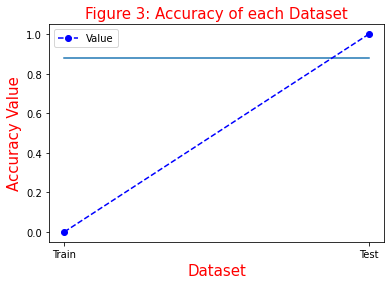

In [37]:
fig, ax3 = plt.subplots()
ax3.plot(Dataset,accuracyVal)
plt.plot(range(2), linestyle='--', marker='o', color='b', label='Value')
ax3.set_xlabel('Dataset',color='r', fontsize=15)
ax3.set_ylabel('Accuracy Value', color='r',fontsize=15)
ax3.set_title('Figure 3: Accuracy of each Dataset',color='r',fontsize=15)
plt.legend()

In [38]:
# Checking confusion matrix
print("Confusion matrix on test set: ")
print(confusion_matrix(y_test, y_pred_test))

Confusion matrix on test set: 
[[66880     0]
 [ 9342     0]]


In [39]:
print("Confusion matrix on train set: ")
print(confusion_matrix(y_train, y_pred_train))

Confusion matrix on train set: 
[[267519      0]
 [ 37368      0]]


## Training KNN Method
- Based on the above result, accuracy achieved by the simple logistic regression model is great
- Using the KNN method to make the model more accurate

In [30]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [31]:
X_train, X_test, y_train, y_test = train_test_split(train_digit.drop(['Response'], axis=1), train_digit['Response'], stratify=train_digit['Response'], test_size=.2, random_state=7)

In [32]:
# Create and training a KNN classifier model
clf = KNeighborsClassifier(n_neighbors = 7)
clf.fit(X_train, y_train)

# Use the model to predict testing data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('Testing accuracy is: ', accuracy)

Testing accuracy is:  0.8661410091574611


In [33]:
KNN = KNeighborsClassifier(n_neighbors=10)

KNN.fit(X_train, y_train)
print(KNN)

y_expect = y_test
y_pred = KNN.predict(X_test)

print(metrics.classification_report(y_expect,y_pred))

KNeighborsClassifier(n_neighbors=10)
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66880
           1       0.22      0.01      0.01      9342

    accuracy                           0.88     76222
   macro avg       0.55      0.50      0.47     76222
weighted avg       0.80      0.88      0.82     76222



In [34]:
# from sklearn.model_selection import GridSearchCV

# # Define search space for parameters
# parameter_grid = {'n_neighbors': range(5, 80)}

# X = train_digit.drop(['Response'], axis=1)
# y = train_digit['Response']

# # Create the machine learning model
# knn_clf = KNeighborsClassifier()
# clf = GridSearchCV(knn_clf, parameter_grid, scoring='accuracy', cv=5)
# clf.fit(X, y)

# # Identify the best parameter(s)
# print('Best K value: ', clf.best_params_['n_neighbors'])
# print('The accuracy: ', clf.best_score_)

## Observations
- GridSearchCV method hasn't outputted anything waiting, been waiting for 2 days
- In the output above shows that the K-value is f1-score is 0.93 for x and y train is 1.00 and for x and y test is 0.01
- This report consist of an exploration of current customers Response to car insurance policy provide by their Health Insurance provider, we have discovered that large majority of clients have are not interested in opening up car insurance account with their current provider with the biggest factor coming into play by their driving license, vehichle damage and previous insurances status. This demonstrated by the feature selection with accuracy of 0.86 percent, which gives us a solid insight of how the company can market its current policies towards its customer base.